In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [61]:
%cd D:\MSC\Trimester2\LabonML\Datasets

D:\MSC\Trimester2\LabonML\Datasets


In [62]:
dataset = pd.read_csv('haberman.data',names=['age', 'year', 'nodes','class'])

In [63]:
dataset.shape

(306, 4)

In [64]:
dataset.head()

,age,year,nodes,class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [92]:
dataset.describe()

,age,year,nodes,class
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [93]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   class   306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'nodes'}>,
        <AxesSubplot:title={'center':'class'}>]], dtype=object)

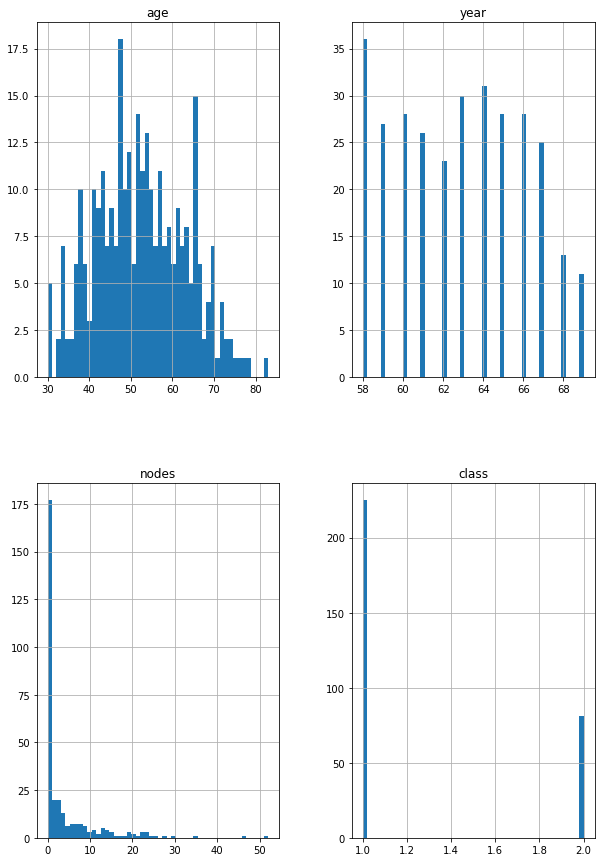

In [65]:
dataset.hist(bins=50,figsize=(10,15))

In [66]:
dataset_corr_matrix=dataset.corr()

In [67]:
dataset_corr_matrix

,age,year,nodes,class
age,1.000000,0.089529,-0.063176,0.067950
year,0.089529,1.000000,-0.003764,-0.004768
nodes,-0.063176,-0.003764,1.000000,0.286768
class,0.067950,-0.004768,0.286768,1.000000


In [68]:
ds_train,ds_test=train_test_split(dataset,test_size=0.2,random_state=0)

In [69]:
ds_train.shape,ds_test.shape

((244, 4), (62, 4))

In [70]:
ds_corr_matrix=ds_train.corr()

In [71]:
ds_corr_matrix

,age,year,nodes,class
age,1.000000,0.150289,-0.042905,0.080553
year,0.150289,1.000000,0.013317,0.022337
nodes,-0.042905,0.013317,1.000000,0.319619
class,0.080553,0.022337,0.319619,1.000000


In [72]:
ds_corr_matrix["class"].sort_values(ascending=False)

class    1.000000
nodes    0.319619
age      0.080553
year     0.022337
Name: class, dtype: float64

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='year', ylabel='age'>,
        <AxesSubplot:xlabel='nodes', ylabel='age'>,
        <AxesSubplot:xlabel='class', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='nodes', ylabel='year'>,
        <AxesSubplot:xlabel='class', ylabel='year'>],
       [<AxesSubplot:xlabel='age', ylabel='nodes'>,
        <AxesSubplot:xlabel='year', ylabel='nodes'>,
        <AxesSubplot:xlabel='nodes', ylabel='nodes'>,
        <AxesSubplot:xlabel='class', ylabel='nodes'>],
       [<AxesSubplot:xlabel='age', ylabel='class'>,
        <AxesSubplot:xlabel='year', ylabel='class'>,
        <AxesSubplot:xlabel='nodes', ylabel='class'>,
        <AxesSubplot:xlabel='class', ylabel='class'>]], dtype=object)

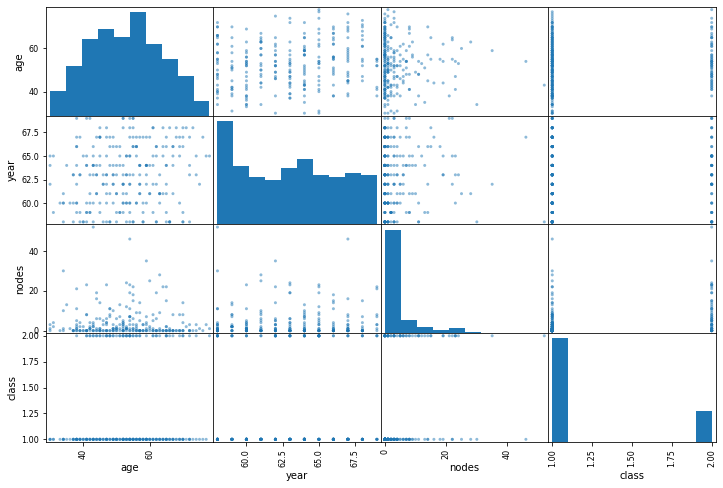

In [73]:
from pandas.plotting import scatter_matrix
attributes = ["age","year","nodes","class"]
scatter_matrix(ds_train[attributes], figsize=(12, 8))

In [74]:
ds_train.head()

,age,year,nodes,class
255,64,66,0,1
129,50,63,1,1
73,44,64,6,2
278,67,65,0,1
157,53,65,1,2


In [75]:
y=ds_train["class"]
y_test=ds_test["class"]
ds_train = ds_train.drop('class',axis=1)

In [76]:
y.shape

(244,)

In [77]:
ds_train.shape

(244, 3)

In [78]:
clf = LogisticRegression(random_state=0).fit(ds_train, y)

In [79]:
clf

LogisticRegression(random_state=0)

In [80]:
ds_test = ds_test.drop('class',axis=1)

In [81]:
ds_test.shape

(62, 3)

In [82]:
y_pred = clf.predict(ds_test)

In [83]:
clf.score(ds_test, y_test)

0.6290322580645161

In [84]:
# dropping year column

In [85]:
ds_train_new=ds_train.drop("year",axis=1)
ds_test_new=ds_test.drop("year",axis=1)

In [86]:
ds_train_new.shape,ds_test_new.shape

((244, 2), (62, 2))

In [87]:
clf = LogisticRegression(random_state=0).fit(ds_train_new, y)

In [88]:
clf

LogisticRegression(random_state=0)

In [89]:
y_pred = clf.predict(ds_test_new)

In [90]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [91]:
clf.score(ds_test_new, y_test)

0.6290322580645161